# Final Project - Bayesian model selection

In [105]:
import arviz as az
import numpy as np
import pymc3 as pm

from matplotlib import pyplot as plt
from scipy.special import betaln
from scipy.stats import beta

In [106]:

np.random.seed(11)           # for reproducibility
a=0.25                       # biased coin
flips=np.random.rand(2**12)  # simulates 4096 coin flips
heads=flips<a    # boolean array, heads[i]=True if flip i is heads
np.sum(heads)

983

Initializing SMC sampler...
Sampling 2 chains in 2 jobs
Stage:   0 Beta: 1.000
Stage:   0 Beta: 1.000
Initializing SMC sampler...
Sampling 2 chains in 2 jobs
Stage:   0 Beta: 1.000
Stage:   0 Beta: 1.000


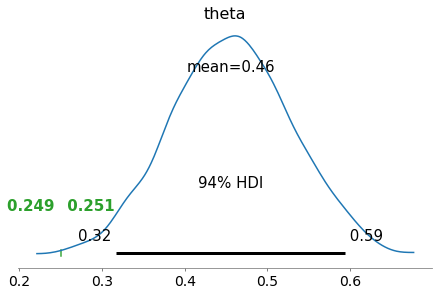

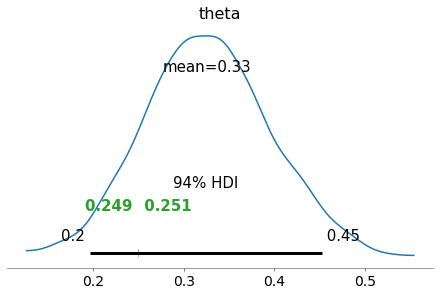

In [107]:
with pm.Model() as model1: #model of a fair coin
    theta = pm.Normal("theta",mu=.5,sigma=.1) #prior for the parameter theta
    yl = pm.Bernoulli("yl", theta, observed=heads[:20]) #likelihood given the measured data
    trace1 = pm.sample_smc(1000, random_seed=42, parallel=False) #sample from posterior
with pm.Model() as model2: #model of biased coin  
    theta = pm.Normal("theta",mu=.25,sigma=.1) #prior for the parameter theta
    yl = pm.Bernoulli("yl", theta, observed=heads[:20]) #likelihood given the measured data
    trace2 = pm.sample_smc(1000, random_seed=42, parallel=False) #sample from posterior
with model1:
    az.plot_posterior(trace1,rope=[0.249,0.251])
with model2:
    az.plot_posterior(trace2,rope=[0.249,0.251])


In [108]:
theta_array=trace1["theta"]
norm_const=len(trace1["theta"])
BF_smc = np.exp(trace2.report.log_marginal_likelihood - trace1.report.log_marginal_likelihood)#bayes factor
np.round(BF_smc)

array([1., 1.])

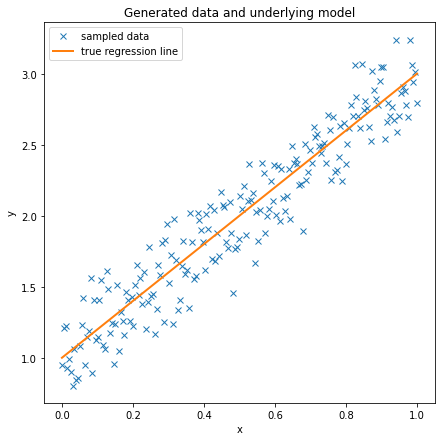

In [196]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=0.2, size=size)

data = dict(x=x, y=y)
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x, y, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
plt.legend(loc=0);


In [201]:
sampleSize = 3000

with pm.Model() as lin_model:  # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = pm.HalfCauchy("sigma", beta=10, testval=1.0)
    intercept = pm.Normal("Intercept", 0, sigma=20)
    m = pm.Normal("m", 0, sigma=20)
    
    mu = pm.Deterministic('mu', intercept + m * x)
    # Define likelihood
    likelihood = pm.Normal("y", mu=mu, sigma=sigma, observed=y)

    # Inference!
    lin_trace =  pm.sample_smc(sampleSize, random_seed=42, parallel=False) 

with pm.Model() as const_model:  # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = pm.HalfCauchy("sigma", beta=10, testval=1.0)
    intercept = pm.Normal("Intercept", 0, sigma=20)
    #x_coeff = pm.Normal("x", 0, sigma=20)

    # Define likelihood
    mu = pm.Deterministic('mu', intercept+x*0)
    likelihood = pm.Normal("y", mu=mu, sigma=sigma, observed=y)

    # Inference!
    const_trace =  pm.sample_smc(sampleSize, random_seed=42, parallel=False) 
    
with pm.Model() as sq_model:  # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = pm.HalfCauchy("sigma", beta=10, testval=1.0)
    intercept = pm.Normal("Intercept", 0, sigma=20)
    #x_coeff = pm.Normal("x", 0, sigma=20)
    a = pm.Normal("a", 0, sigma=20)
    b = pm.Normal("b", 0, sigma=20)
    
    # Define likelihood
    mu = pm.Deterministic('mu', intercept+x*b+a*x**2)
    likelihood = pm.Normal("y", mu=mu, sigma=sigma, observed=y)

    # Inference!
    sq_trace =  pm.sample_smc(sampleSize, random_seed=42, parallel=False) 
    

Initializing SMC sampler...
Sampling 2 chains in 2 jobs
Stage:   0 Beta: 0.003
Stage:   1 Beta: 0.008
Stage:   2 Beta: 0.013
Stage:   3 Beta: 0.020
Stage:   4 Beta: 0.029
Stage:   5 Beta: 0.040
Stage:   6 Beta: 0.058
Stage:   7 Beta: 0.086
Stage:   8 Beta: 0.134
Stage:   9 Beta: 0.254
Stage:  10 Beta: 0.560
Stage:  11 Beta: 1.000
Stage:   0 Beta: 0.003
Stage:   1 Beta: 0.007
Stage:   2 Beta: 0.011
Stage:   3 Beta: 0.016
Stage:   4 Beta: 0.024
Stage:   5 Beta: 0.036
Stage:   6 Beta: 0.057
Stage:   7 Beta: 0.108
Stage:   8 Beta: 0.241
Stage:   9 Beta: 0.586
Stage:  10 Beta: 1.000
Initializing SMC sampler...
Sampling 2 chains in 2 jobs
Stage:   0 Beta: 0.003
Stage:   1 Beta: 0.007
Stage:   2 Beta: 0.012
Stage:   3 Beta: 0.022
Stage:   4 Beta: 0.050
Stage:   5 Beta: 0.142
Stage:   6 Beta: 0.462
Stage:   7 Beta: 1.000
Stage:   0 Beta: 0.003
Stage:   1 Beta: 0.007
Stage:   2 Beta: 0.012
Stage:   3 Beta: 0.021
Stage:   4 Beta: 0.049
Stage:   5 Beta: 0.144
Stage:   6 Beta: 0.453
Stage:   7 Bet

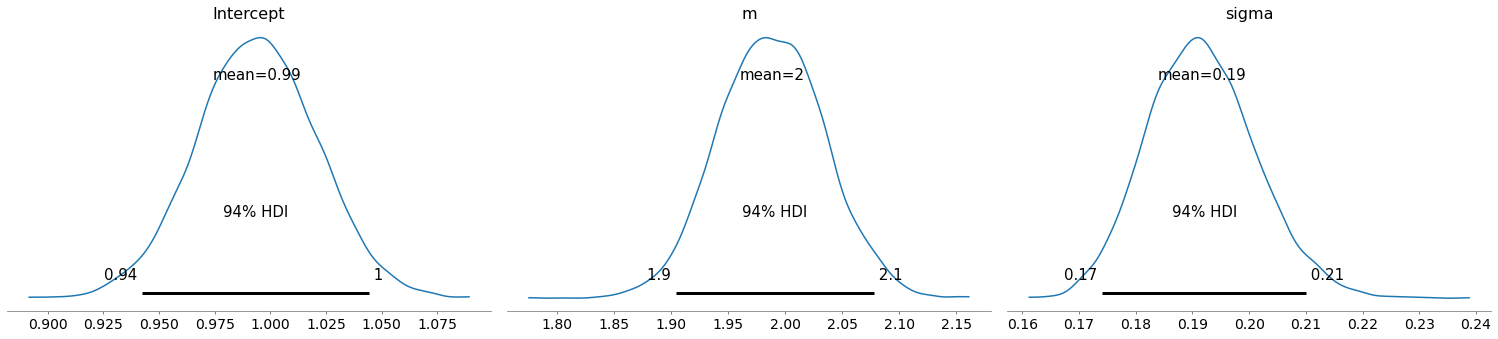

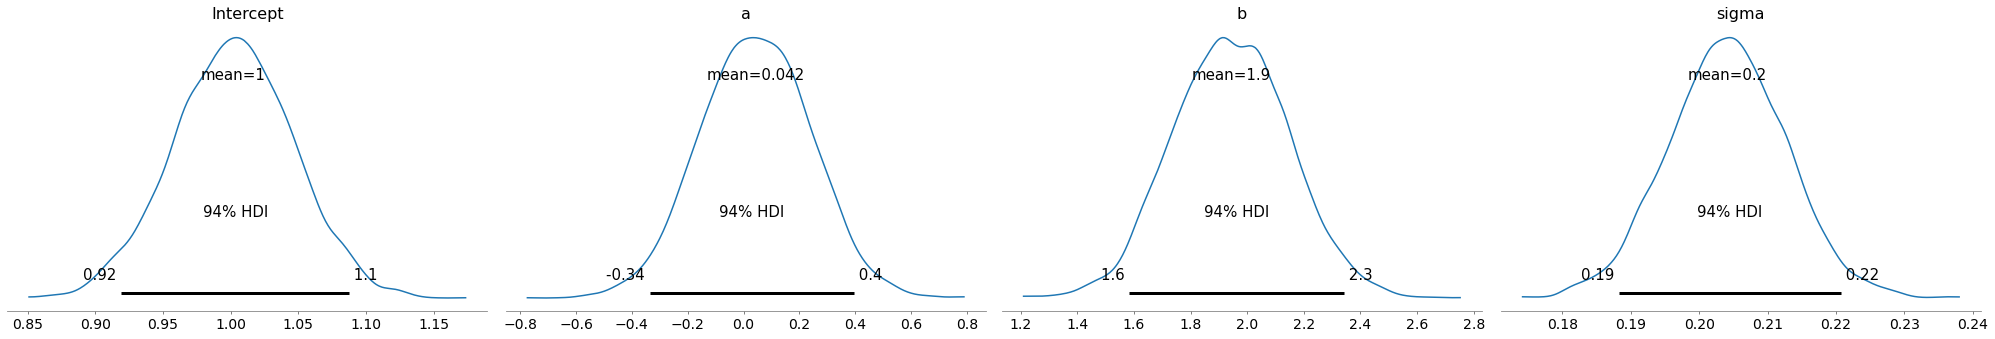

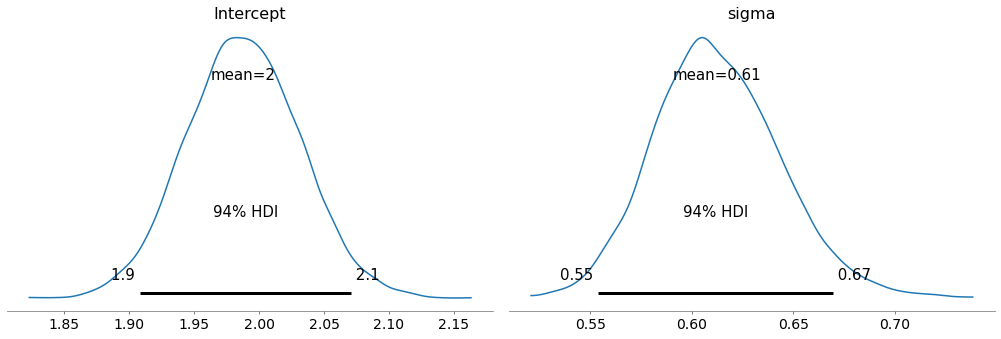

In [202]:
with lin_model:
    az.plot_posterior(lin_trace, var_names=['Intercept', 'm', 'sigma'])

with sq_model:
    az.plot_posterior(sq_trace, var_names=['Intercept', 'a', 'b','sigma'])    

with const_model:
    az.plot_posterior(const_trace, var_names=['Intercept', 'sigma'])
    
    

/usr/local/lib/python3.8/site-packages/arviz/utils.py:660: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  warnings.warn(
/usr/local/lib/python3.8/site-packages/arviz/stats/stats.py:493: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(
/usr/local/lib/python3.8/site-packages/arviz/utils.py:660: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  warnings.warn(
/usr/local/lib/python3.8/site-packages/arviz/stats/stats.py:493: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(
/usr/local/lib/python3.8/site-packages/arviz/utils.py:660: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  warnings.warn(
/

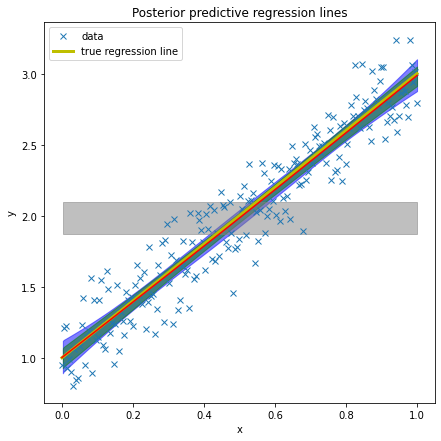

In [203]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, "x", label="data")
#pm.plot_posterior_predictive_glm(lin_trace, samples=100, label="posterior predictive regression lines")
plt.plot(x, true_regression_line, label="true regression line", lw=3.0, c="y")

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("x")
plt.ylabel("y");
sig2 = az.plot_hpd(x, sq_trace['mu'], credible_interval=.99, color='b')
sig1 = az.plot_hpd(x, lin_trace['mu'], credible_interval=.99, color='g')
plt.plot(x, np.mean(sq_trace['Intercept'])+np.mean(sq_trace['a'])*x**2+np.mean(sq_trace['b'])*x, color='red')
sig3 = az.plot_hpd(x, const_trace['mu'], credible_interval=.99, color='gray')


In [204]:
def Bayes_Factor(trace1, trace2):
    return  np.exp(trace1.report.log_marginal_likelihood - trace2.report.log_marginal_likelihood)#bayes factor

Bayes_Factor(lin_trace, sq_trace)

array([6.65800025e+04, 3.02223485e+11])

In [ ]:
sampleSize = 10000
with pm.Model() as gauss_model:  # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = pm.HalfCauchy("sigma", beta=10, testval=1.0)
    #intercept = pm.Normal("Intercept", 0, sigma=20)
    A = pm.Normal("A",0, sigma=20)
    a = pm.Normal("a", 0, sigma=20)
    s = pm.Normal("s", 0, sigma=20)
    # Define likelihood
    gauss = pm.Deterministic('gauss', A*np.exp(-(x-a)**2/(2*s**2)))
    likelihood = pm.Normal("y", mu=gauss, sigma=sigma, observed=y)

    # Inference!
    gauss_trace =  pm.sample_smc(sampleSize, random_seed=42, n_steps=40)#, parallel=False) 
    

Initializing SMC sampler...
Sampling 2 chains in 2 jobs
Stage:   0 Beta: 0.004
Stage:   1 Beta: 0.010
Stage:   2 Beta: 0.025
Stage:   3 Beta: 0.050
Stage:   4 Beta: 0.067
Stage:   5 Beta: 0.079
Stage:   6 Beta: 0.095
Stage:   7 Beta: 0.214
Stage:   8 Beta: 0.310
Stage:   9 Beta: 0.418
Stage:  10 Beta: 0.545
Stage:  11 Beta: 0.715
Stage:  12 Beta: 0.958
Stage:  13 Beta: 1.000
Stage:   0 Beta: 0.004
Stage:   1 Beta: 0.010
Stage:   2 Beta: 0.024
Stage:   3 Beta: 0.048
Stage:   4 Beta: 0.072
Stage:   5 Beta: 0.102
Stage:   6 Beta: 0.131
Stage:   7 Beta: 0.153
Stage:   8 Beta: 0.188
Stage:   9 Beta: 0.259
Stage:  10 Beta: 0.354
Stage:  11 Beta: 0.488
Stage:  12 Beta: 0.662
Stage:  13 Beta: 0.893
Stage:  14 Beta: 1.000


In [ ]:
az.plot_posterior(gauss_trace, var_names=['A', 'a', 's', 'sigma'])


/usr/local/lib/python3.8/site-packages/arviz/utils.py:660: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  warnings.warn(
/usr/local/lib/python3.8/site-packages/arviz/stats/stats.py:493: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


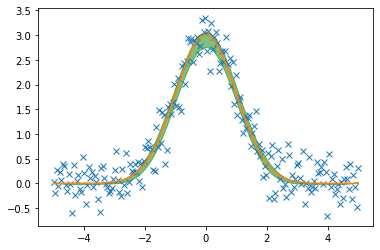

In [237]:
x = np.linspace(-5, 5, size)
# y = a + b*x
true_regression_line = 3*np.exp(-(x-0)**2/(2*1**2))
# add noise
y = true_regression_line + np.random.normal(scale=0.3, size=size)
plt.plot(x,y, "x")
plt.plot(x, true_regression_line)
sig1 = az.plot_hpd(x, gauss_trace['gauss'], credible_interval=.99, color='g')
